## The setup 

### Xlegic Sin'Austin ||| Haya Toumy

In [75]:
import requests as res
import json 
import pandas as pd
from time import sleep

In [76]:
%pwd

'/home/i/Documents/global/evacuation-routes'

In [77]:

consumer_key = '81m7Ed67rFO0yYtLQJpw95kGM'

consumer_secret = 'nas6cHtZDnmYwAoEjwA3DEzjyxVhB1YN04tooxkD9Lmot17El1'

access_token = '1081242889609535488-eFvX06XDuOOPjeN6zUe9KcgBbG78eB'

access_token_secret = 'g8V9kqORBJ8lnkAZcCEXkMHepRaFWhAE1yc13eqeFVlhJ'

In [78]:
import tweepy

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

### The cities name and Twitter usernames data frames

In [79]:
from bs4 import BeautifulSoup

Gathering the most flooded cities in the US from the link below. <br /> 
Gathering the traffic Twitter usernames for each of these cities manually. <br />
Putting them together in a data frame for quick retreival. 

In [80]:
flood_url = 'https://www.cheatsheet.com/culture/american-cities-homes-danger-flooding.html/'

In [81]:
flood_content = res.get(flood_url)

In [82]:
flood_soup = BeautifulSoup(flood_content.content, 'lxml')

In [83]:
cities = []
for h in flood_soup.find_all('h2'):
#     print(h.text.split('.')[1:])
#     print("".join(h.text.split('.')[1:]))
    cities.append("".join(h.text.split('.')[1:]))

In [84]:
# cleaning up the city names and location:
cities.index(' St Augustine')

8

In [85]:
# adding the state to St Augustine
cities[8] = " St Augustine, Florida"

In [86]:
cities = [i.strip() for i in cities]
cities

['Pahrump, Nevada',
 'Jersey City, New Jersey',
 'Plano, Texas',
 'Peachtree Corners, Georgia',
 'Miramar Beach, Florida',
 'Raleigh, North Carolina',
 'Rogers City, Arkansas',
 'Carmel, Indiana',
 'St Augustine, Florida',
 'The Woodlands, Texas',
 'Round Rock, Texas',
 'Denton, Texas',
 'Kissimmee, Florida',
 'San Marcos, Texas',
 'Sugar Land, Texas']

In [87]:
twitter_user_names = [
    ["nevadadot"],
    ["NJDOT_info", "511nyNJ"],
    ["TotalTrafficDFW", "krldtraffic", "NTTATravelAlert", "cityofplanotx"],
    ["PtreeCorners"],
    ["fl511_panhandl"],
    ["TotalTrafficRDU", "NCDOT_Triangle", "NCDOT", "RW911", "NCDOT_I77"],
    ["myARDOT", "traffic_nwa", "myARDOT"],
    ["QCTrafficAlerts", "WIBCTraffic"],
    ["fl511_northeast", "SJSOPIO"],
    ["ih45n_traffic", "KPRC2Traffic", "TownshipTransit"],
    ["roundrock"],
    ["DentonTweets", "ScannerRadioDFW", "DFWscanner"],
    ["fl511_central", "MyNews13Traffic", "fl511_state"],
    ["TxDOT", "TotalTrafficAUS"],
    ["SugarLandtxgov", "houstontranstar", "TotalTrafficHOU"]
    
]

In [88]:
data_f = pd.DataFrame(twitter_user_names).T

In [89]:
data_f.columns = cities
data_f

,"Pahrump, Nevada","Jersey City, New Jersey","Plano, Texas","Peachtree Corners, Georgia","Miramar Beach, Florida","Raleigh, North Carolina","Rogers City, Arkansas","Carmel, Indiana","St Augustine, Florida","The Woodlands, Texas","Round Rock, Texas","Denton, Texas","Kissimmee, Florida","San Marcos, Texas","Sugar Land, Texas"
0,nevadadot,NJDOT_info,TotalTrafficDFW,PtreeCorners,fl511_panhandl,TotalTrafficRDU,myARDOT,QCTrafficAlerts,fl511_northeast,ih45n_traffic,roundrock,DentonTweets,fl511_central,TxDOT,SugarLandtxgov
1,None,511nyNJ,krldtraffic,None,None,NCDOT_Triangle,traffic_nwa,WIBCTraffic,SJSOPIO,KPRC2Traffic,None,ScannerRadioDFW,MyNews13Traffic,TotalTrafficAUS,houstontranstar
2,None,None,NTTATravelAlert,None,None,NCDOT,myARDOT,None,None,TownshipTransit,None,DFWscanner,fl511_state,None,TotalTrafficHOU
3,None,None,cityofplanotx,None,None,RW911,None,None,None,None,None,None,None,None,None
4,None,None,None,None,None,NCDOT_I77,None,None,None,None,None,None,None,None,None


In [112]:
def get_twitter_user_names(city_name, df = data_f): 
    """
    Returns the Twitter user names that you can plug later in the function: traffic, that get twitter updates.
    
    Parameters:
    ----------
    city_name: Enter the city name, state. All small letters, in this format. Example: "round rock, texas".
    df: the dataframe of city names and their traffic Twitter user names. 
    """
    temp_df = data_f
    temp_df.columns = [col.lower() for col in temp_df.columns]
    try: 
        mask = temp_df[city_name].notna()
         
        return list(temp_df.loc[mask, city_name])
    except KeyError: 
        print(f'This City Does Not Have Twitter User Names Yet. Try From This List: {temp_df.columns}')
    
    

In [91]:
# testing the function:
get_twitter_user_names('denton, texas')

['DentonTweets', 'ScannerRadioDFW', 'DFWscanner']

In [92]:
# recall that our options for cities are:
[col for col in data_f]

['pahrump, nevada',
 'jersey city, new jersey',
 'plano, texas',
 'peachtree corners, georgia',
 'miramar beach, florida',
 'raleigh, north carolina',
 'rogers city, arkansas',
 'carmel, indiana',
 'st augustine, florida',
 'the woodlands, texas',
 'round rock, texas',
 'denton, texas',
 'kissimmee, florida',
 'san marcos, texas',
 'sugar land, texas']

In [93]:
get_twitter_user_names('san marcos, texas')

['TxDOT', 'TotalTrafficAUS']

Next, making a function that will go collect the most recent traffic tweets for us

In [94]:
def gather_tweets(handle:str, n=300):
    """
    Returns the most recent tweets (up to 200), from the selected Twitter username (handle)
    
    Parameters:
    -----------
    handle: name of the Twitter user page
    n: how many tweets you want. can't get more than 200 
    retrieves only recent tweets
    """
    tweets_everything = api.user_timeline(handle, count = n)
    df = pd.DataFrame(columns = ['id', 'tweets', 'date', 'location'])
    
    for i in tweets_everything:
        tweets = i.text
        try: 
            date = i.formatted_date
        except: 
            date = i.created_at
        
        try:
            location = i.geo['coordinates']
        except: 
            try: 
                location = i.coordinates
            except: 
                location = 'NaN'
                
        tweet_id = i.id # by the way, tweet_id is included in the permalink
                
        df.loc[len(df)] = [tweet_id, tweets, date, location] # inside the loop, building the df row by row
        
    return df

### Retrieving Coordinates from the tweets

In [114]:
def get_coor(c, city):
    """Retrieves information using the Mapquest api, and the information provide in the json retrieved from the site.
    and return the coordinates in a string format.
    
    Parameters:
    c =  the address from the tweet. With '.'(periods) instead of ' ' (spaces)
    ie. 123.street
    city = Location being searched in
    ie. city.state
    """
    
    import requests as res
 
    url = 'http://open.mapquestapi.com/geocoding/v1/address?key=8bdpAE3VNuvTqYz4KgRRXTcwANKHWjnG&location='+ c + city
    coor_json = res.get(url)
    lat = coor_json.json()['results'][0]['locations'][0]['latLng']['lat']
    lng = coor_json.json()['results'][0]['locations'][0]['latLng']['lng']
    
    
    print(lat,lng)
    return str(lat),str(lng)

## The main Function

In [116]:
def traffic(location):
    from io import BytesIO
    from PIL import Image
    from urllib import request
    import matplotlib.pyplot as plt
    
    """
    This function takes as input location in the form of -city, state- then will accept a road or highway name,
    returning the most recent tweets from the traffic data frame.
    Enter street name in all any case you like, upper, lower, mix..
    
    It will use IO, PIL, and requests to get a map of the requested area using the 
    mapquest api.
    The map quest api is capable of routing and plotting location also
    
    parameters: 
    location: city, state in the format. *currently only from the specified list)
    
     
    
    """
    print('WARNING: If no users were passed, it will search Houston, TX traffic by default')
    users = get_twitter_user_names(location)
    if users == []:
        users = ["TotalTrafficHOU", "houstontranstar"]
        print("Empty users list passed; changed to default: Houston, TX traffic")
     
    
    location = location.replace(',','.')
    # getting the df, in case there's more than 2 users: 
    #created a function to call itself incase it is not found in report tweets.
    def street():
        try:
            s = input('What street you want to find? ')
            n = []
            lst = []
            incidents = []
            for u in users:
                  
                lst.append(gather_tweets(u))
                
          
            df = pd.concat(lst, 
                    axis = 0, sort = False)

            mask = df['tweets'].str.contains(s, case = False) # case = False makes it not case sensitive!
            tweets_15 = df.loc[mask, 'tweets'].values[:15]
            if len(tweets_15) != 0:
                #print (tweets_15)
            
    # Below are the steps to plot the location of incidents reported in the tweets on a map 
    ## It's commented out because it only plots well for certain locations whos tweets are formatted a certain way
    ### It also has a bug where the retrieved coordinates for the incident location are wrong
    ####  And this will unfortunately zoom the map to another state
                """
                   
                        for i in tweets_15:
                            a = i
                            a = a.split('on')

                            b = a[1].split(',')

                            b=b[0]
                            b = b.split('#')
                            b=b[0]
                            b = b.replace(' ','.')
                            b = b.replace('..','.')
                            b = b.replace('NB','')
                            b = b.replace('..','.')
                            b = b.replace('SB','')
                            b = b.replace('..','.')
                            b = b.replace('EB','')
                            b = b.replace('..','.')
                            b = b.replace('WB','')
                            b = b.replace('..','.')
                            b = b.replace('at','')
                            b = b.replace('..','.')
                            b = b.replace('..','.')
                            b = b.replace('...','.')
                            b = b.replace('....','.')
                            b = b.replace('.....','.')
                            b = b.strip(b[0])

                            n.append(b)    

                        print(n) 
                        for report in n:
                            lat, lng = get_coor(report,location.replace(' ','.'))

                            try:

                                locy = '||' + str(lat) + ','+ str(lng)
                                if locy not in incidents:
                                    incidents.append(locy)
                            except:
                                print('cant')
                        print(incidents)
                    """

            if len(tweets_15) == 0:
                street()
        except:
            print('x')
            
        #http://open.mapquestapi.com/geocoding/v1/address?key=8bdpAE3VNuvTqYz4KgRRXTcwANKHWjnG&location=20.Haymarket.Rd,dallas.tx    
          
        base_url = 'https://www.mapquestapi.com/staticmap/v5/map?key=8bdpAE3VNuvTqYz4KgRRXTcwANKHWjnG&locations='+location.replace(' ','') 
        for i in incidents[1:]:
            base_url = base_url + i.replace("'","")
        print(base_url)
        final_url = base_url + '&defaultMarker=marker-num&traffic=flow|cons|inc&banner=' + location.replace(' ','').upper() + '+EVAC++++++++++++++++++++++++++ATX+P4&zoom=14&size=800,800'

        
        buffer = BytesIO(request.urlopen(final_url).read())
        image = Image.open(buffer)

        # uncomment this to display a larger, higher resolution pop up map
        #image.show()

        #pyplot image
        plt.figure(figsize=(12,12))
        plt.imshow(image)
        plt.show()
        print(tweets_15)
    street()       
            
    
    


What street you want to find? 75
https://www.mapquestapi.com/staticmap/v5/map?key=8bdpAE3VNuvTqYz4KgRRXTcwANKHWjnG&locations=plano.texas


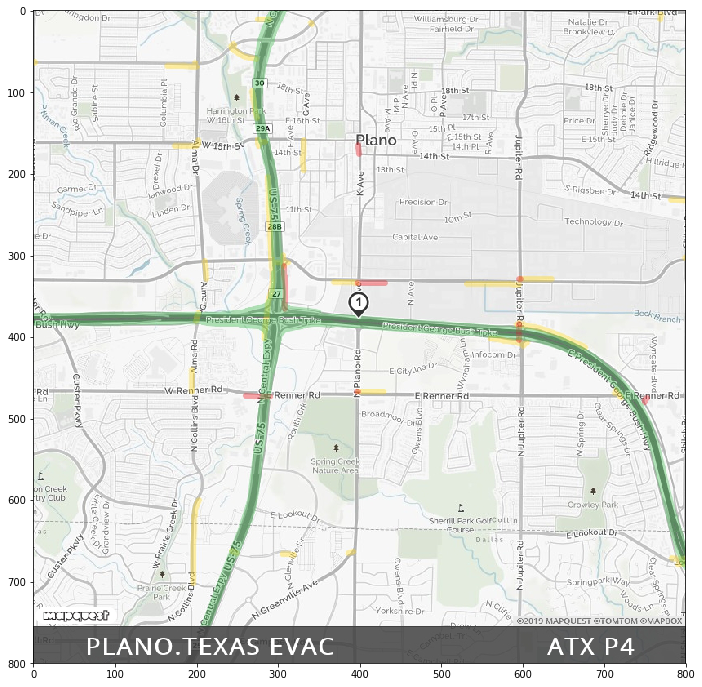

['Disabled cleared in #Dallas on 75 NB at Mockingbird Ln #DFWTraffic https://t.co/4NzBppXRvr'
 'Disabled vehicle. exit blocked. in #Dallas on 75 NB at Mockingbird Ln #DFWTraffic https://t.co/4NzBppXRvr'
 'Disabled cleared on 75 SB at Woodall Rogers Frwy, stop and go traffic back to Lovers Ln, delay of 11 mins… https://t.co/WWI9AJwIDY'
 'Stalled dump truck. left lane on wb exit ramp blocked on 75 SB at Woodall Rogers Frwy, stop and go traffic back to Lovers Ln #DFWTraffic'
 'Accident cleared in #Dallas on 75 NB at NW Hwy, stop and go traffic back to 30, delay of 19 mins #DFWTraffic https://t.co/4NzBppXRvr'
 'Accident, left lane blocked in #Dallas on 75 NB at NW Hwy, stop and go traffic back to 30, delay of 26 mins #DFWTraffic'
 'Accident. left lane on wb exit ramp blocked on 75 SB at Woodall Rogers Frwy, stop and go traffic back to Lovers Ln, delay of 11 mins'
 'Accident cleared in #Plano on 75 SB at Parker Rd, stop and go traffic back to Bethany Dr, delay of 11 mins… https://t.co/4t1yL

In [110]:
#Testing the function
traffic('plano, texas')

## To use this function from a first responder, call the traffic function and pass in the city and state name as shown:
### traffic(your city, your state)

In [ ]:
traffic()